# Segmentação de Clientes - Cartão de Crédito

## 📋 Declaração do Problema
Este projeto foca no desenvolvimento de uma **segmentação de clientes** para auxiliar na definição de estratégias de marketing personalizadas.

O conjunto de dados resume o comportamento de uso de aproximadamente 9.000 titulares de cartões de crédito ativos durante os últimos 6 meses. A análise é realizada ao nível de cliente, utilizando 18 variáveis comportamentais que permitem identificar padrões de consumo e perfis financeiros.

---

## 📂 Dicionário de Dados

O conjunto de dados contém as seguintes variáveis:

| Variável | Descrição |
| :--- | :--- |
| **CUST_ID** | Identificação do titular do cartão de crédito (Categórica) |
| **BALANCE** | Saldo disponível na conta para compras |
| **BALANCE_FREQUENCY** | Frequência de atualização do saldo (0 a 1) |
| **PURCHASES** | Valor total das compras realizadas |
| **ONEOFF_PURCHASES** | Valor máximo de compras realizadas de uma só vez |
| **INSTALLMENTS_PURCHASES** | Valor das compras parceladas |
| **CASH_ADVANCE** | Valor de adiantamento em dinheiro (saque) |
| **PURCHASES_FREQUENCY** | Frequência de compras (0 a 1) |
| **ONEOFF_PURCHASES_FREQUENCY** | Frequência de compras à vista (0 a 1) |
| **PURCHASES_INSTALLMENTS_FREQUENCY** | Frequência de compras parceladas (0 a 1) |
| **CASH_ADVANCE_FREQUENCY** | Frequência de pagamentos de adiantamentos em dinheiro |
| **CASH_ADVANCE_TRX** | Número de transações com "Adiantamento em dinheiro" |
| **PURCHASES_TRX** | Número de transações de compra realizadas |
| **CREDIT_LIMIT** | Limite de crédito do cartão do usuário |
| **PAYMENTS** | Valor total de pagamentos realizados pelo usuário |
| **MINIMUM_PAYMENTS** | Valor mínimo de pagamentos realizados pelo usuário |
| **PRC_FULL_PAYMENT** | Percentual do saldo pago integralmente pelo usuário |
| **TENURE** | Tempo de vigência (meses) do serviço de cartão de crédito |

---

## 🛠️ Tecnologias Recomendadas
* **Linguagem:** Python
* **Bibliotecas:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn (K-


## 🛠️ Tecnologias e Dependências

O projeto foi desenvolvido em **Python 3.x** utilizando as seguintes bibliotecas:

* **Pandas:** Manipulação e análise de dados tabulares.
* **NumPy:** Operações matemáticas e suporte para arrays multidimensionais.
* **Matplotlib & Seaborn:** Visualização de dados e plotagem de gráficos estatísticos.
* **Scikit-Learn:** Ferramentas para pré-processamento (`StandardScaler`) e algoritmos de aprendizado de máquina (`PCA`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 📂 Acesso aos Arquivos
O projeto utiliza o **Google Drive** como sistema de arquivos persistente. Para rodar este notebook no ambiente do Colab, utilize:

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 📊 Dataset
O conjunto de dados utilizado é o **Credit Card Dataset**, comumente usado para tarefas de **Clustering**.

In [3]:
# Definindo o diretório do arquivo no Google Drive
caminho_arquivo = '/content/drive/MyDrive/Data Science - Kaggle - Cluster/credit card/Credit Card.csv'

# Leitura do arquivo CSV
df = pd.read_csv(caminho_arquivo)

# Visualização das 5 primeiras linhas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

### 🔎 Exploração Inicial
Uma análise descritiva foi realizada para entender a distribuição dos dados e identificar a necessidade de pré-processamento (scaling).

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 🧹 Qualidade e Limpeza de Dados
Antes do processamento, foi realizada uma verificação de integridade para identificar registros redundantes.

In [6]:

# Verificar quantas linhas exatamentes iguais existem no data set(sem incluir a original)
df.duplicated().sum()

np.int64(0)

### 🛠️ Tratamento de Dados Ausentes
Foi realizada uma inspeção para identificar colunas com valores nulos, definindo a estratégia de tratamento (exclusão ou imputação) com base na volumetria dos dados faltantes.

In [7]:

# Verificar valores nulos nas colunas
# Caso fosse poucos valores nulos, poderia apenas apagar as linhas que contém esse dado
# Porém se tiver muitas linhas com dados nulos, apagar poderia reduzir a eficiencia do algoritmo.
# Em caso de grande quantidade de dados, poderia substituir pela mediana em casos numéricos ou inserir o valor mais repetido na coluna no caso de ser categorico
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


#### 🔧 Imputação de Dados Específicos
* **Coluna `MINIMUM_PAYMENTS`**: Valores ausentes foram preenchidos com `0`. A lógica de negócio assume que a ausência de registro nesta coluna reflete a inexistência de pagamentos mínimos efetuados pelo cliente.

In [8]:
#Substituir os valores nulos de   minimum_payments  para 0
#Caracteriza que não foi feito nenhum pagamento
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)

#### 🔧 Imputação de Dados Específicos
* **Coluna `CREDIT_LIMIT`**: Os valores ausentes foram preenchidos com a **mediana**. Optou-se por essa medida de tendência central para mitigar o impacto de valores extremos na distribuição do limite de crédito.

In [10]:
# Substituir os valores nulos de CREDIT_LIMIT pela mediana da coluna
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

# Verificando se todos os nulos foram tratados no dataset
print("Nulos restantes no DataFrame:")
print(df.isnull().sum().sum())

Nulos restantes no DataFrame:
0


In [11]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


### 📈 Perfil de Permanência (Tenure)
Uma análise da variável `TENURE` revelou que a grande maioria dos clientes utiliza o serviço há 12 meses. Essa homogeneidade no tempo de uso é positiva para o modelo, pois permite comparar comportamentos de consumo em uma janela temporal similar.

In [ ]:
#Data set possui mais clientes com 12 meses de uso
df["TENURE"].value_counts().sort_index()

,count
TENURE,
6,204
7,190
8,196
9,175
10,236
11,365
12,7584


### 📊 Detecção de Outliers
A visualização através de **Boxplots** foi utilizada para mapear a distribuição estatística de cada atributo.

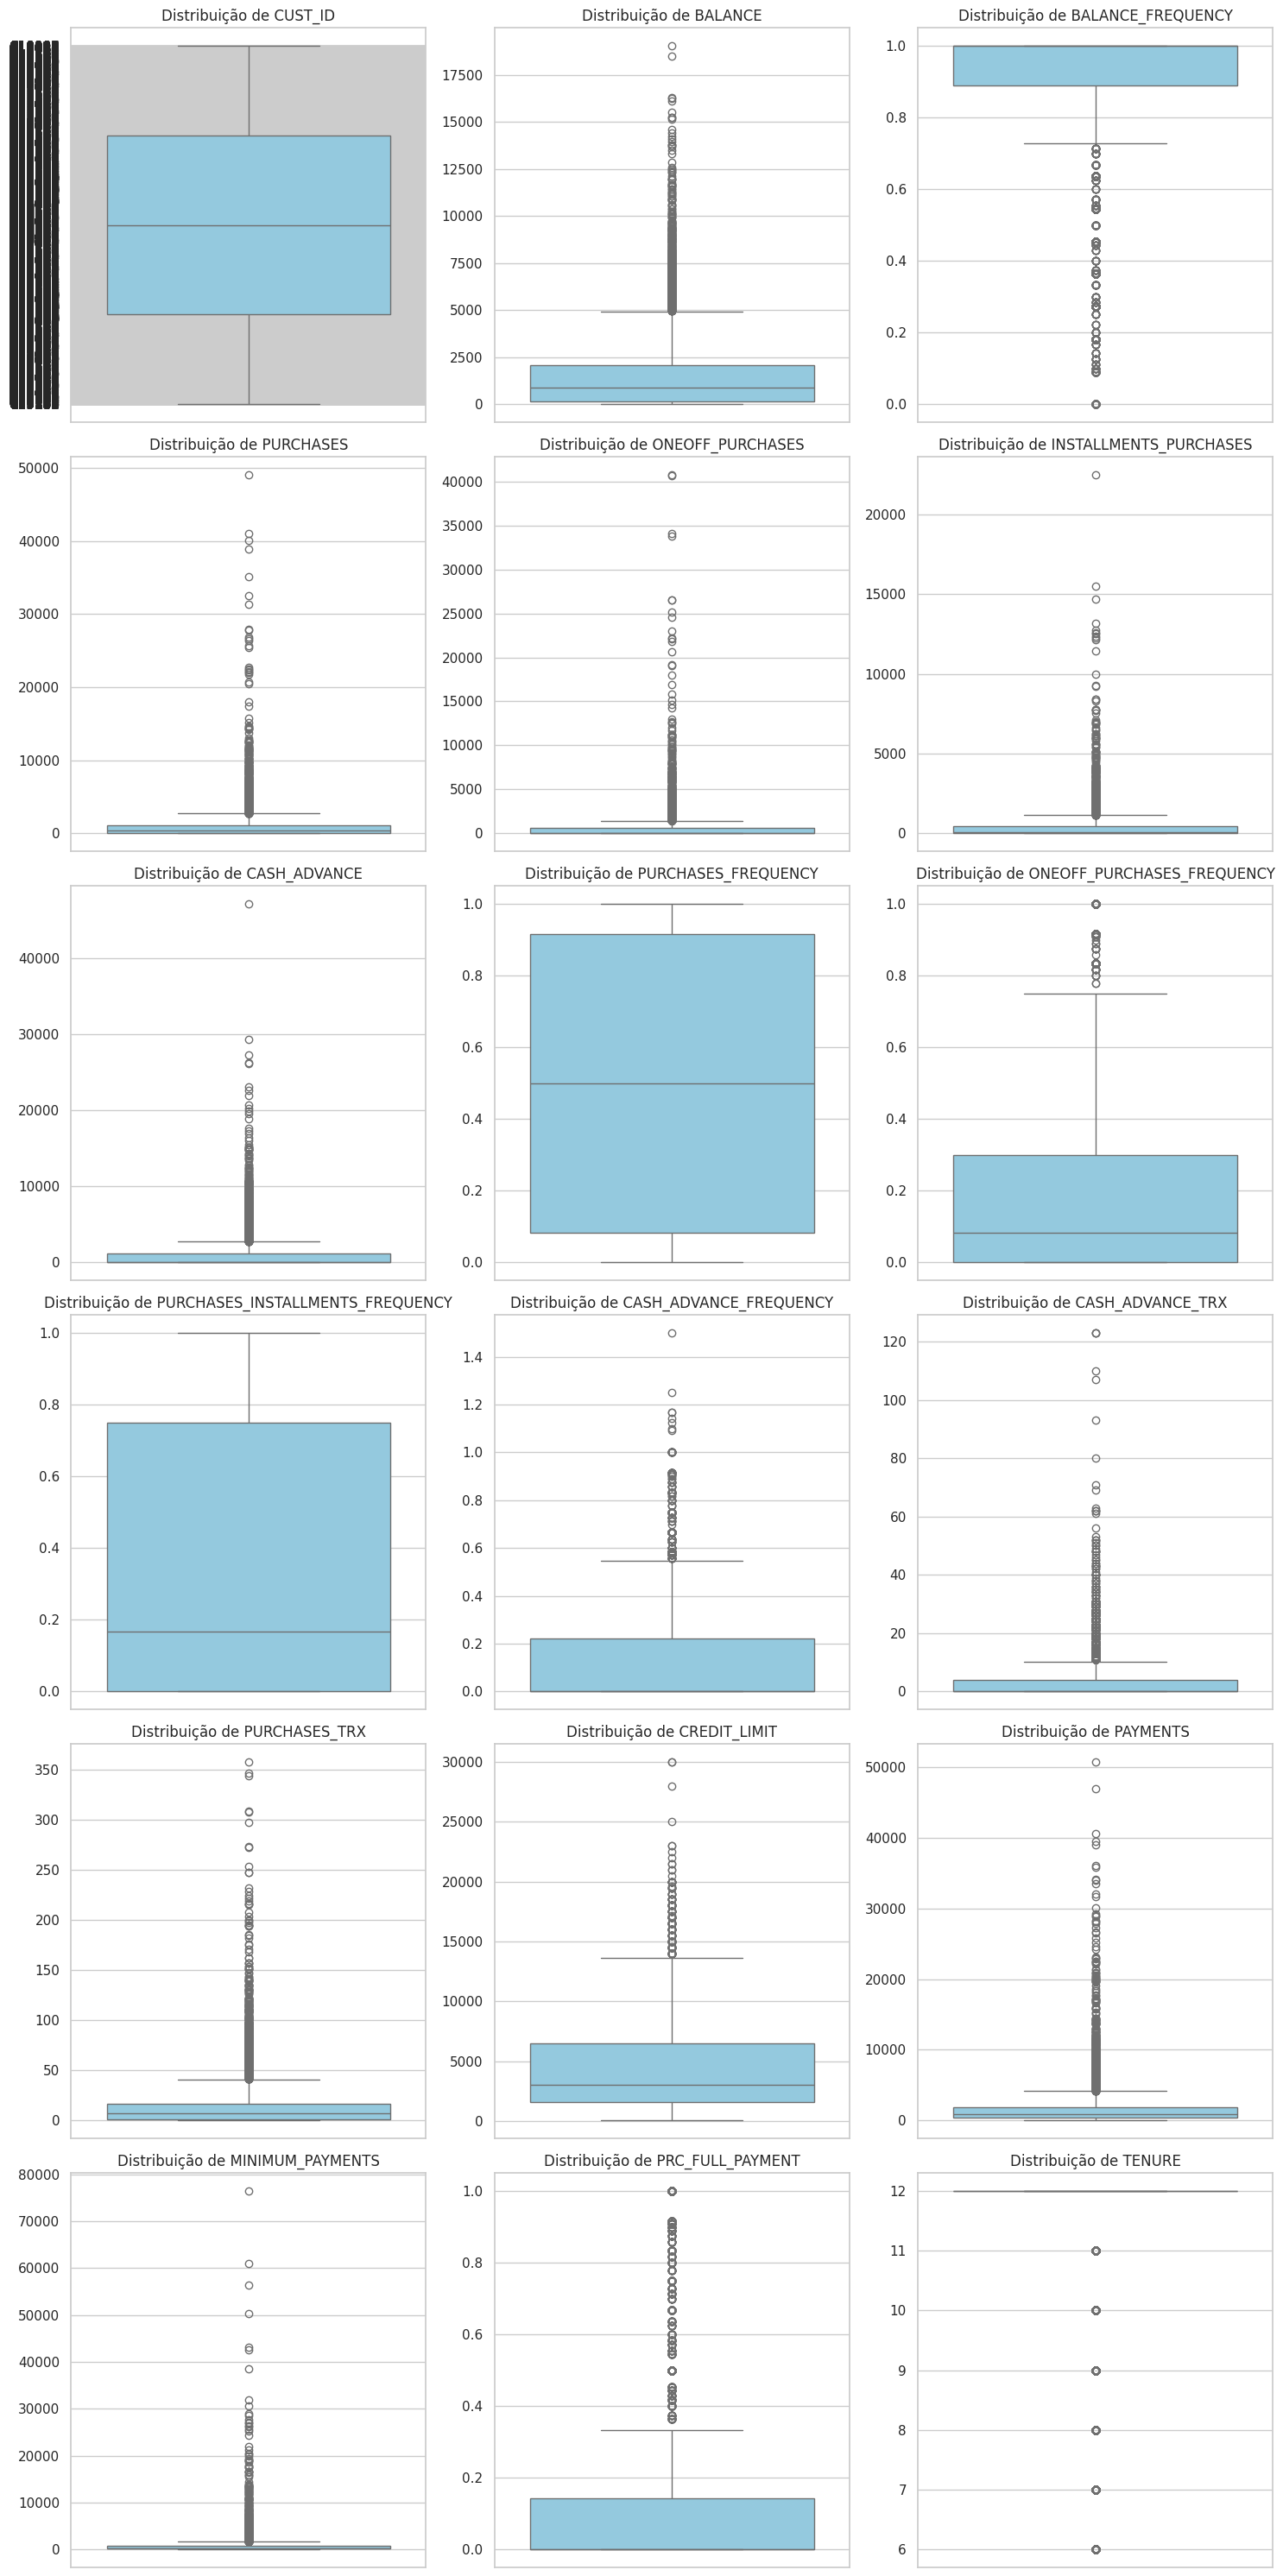

In [12]:
# Configurar o layout da grade (ex: 6 linhas e 3 colunas)
n_cols = 3
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
sns.set_theme(style="whitegrid")

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Distribuição de {col}', fontsize=12)
    plt.ylabel('')
    plt.tight_layout()

### 📈 Técnicas de Visualização Adicionais
Para aprofundar a compreensão do dataset, foram utilizadas:
* **Histogramas:** Para analisar a assimetria (skewness) das variáveis financeiras.
* **Pairplots:** Para observar visualmente a formação de possíveis agrupamentos naturais entre as variáveis de gasto e limite.

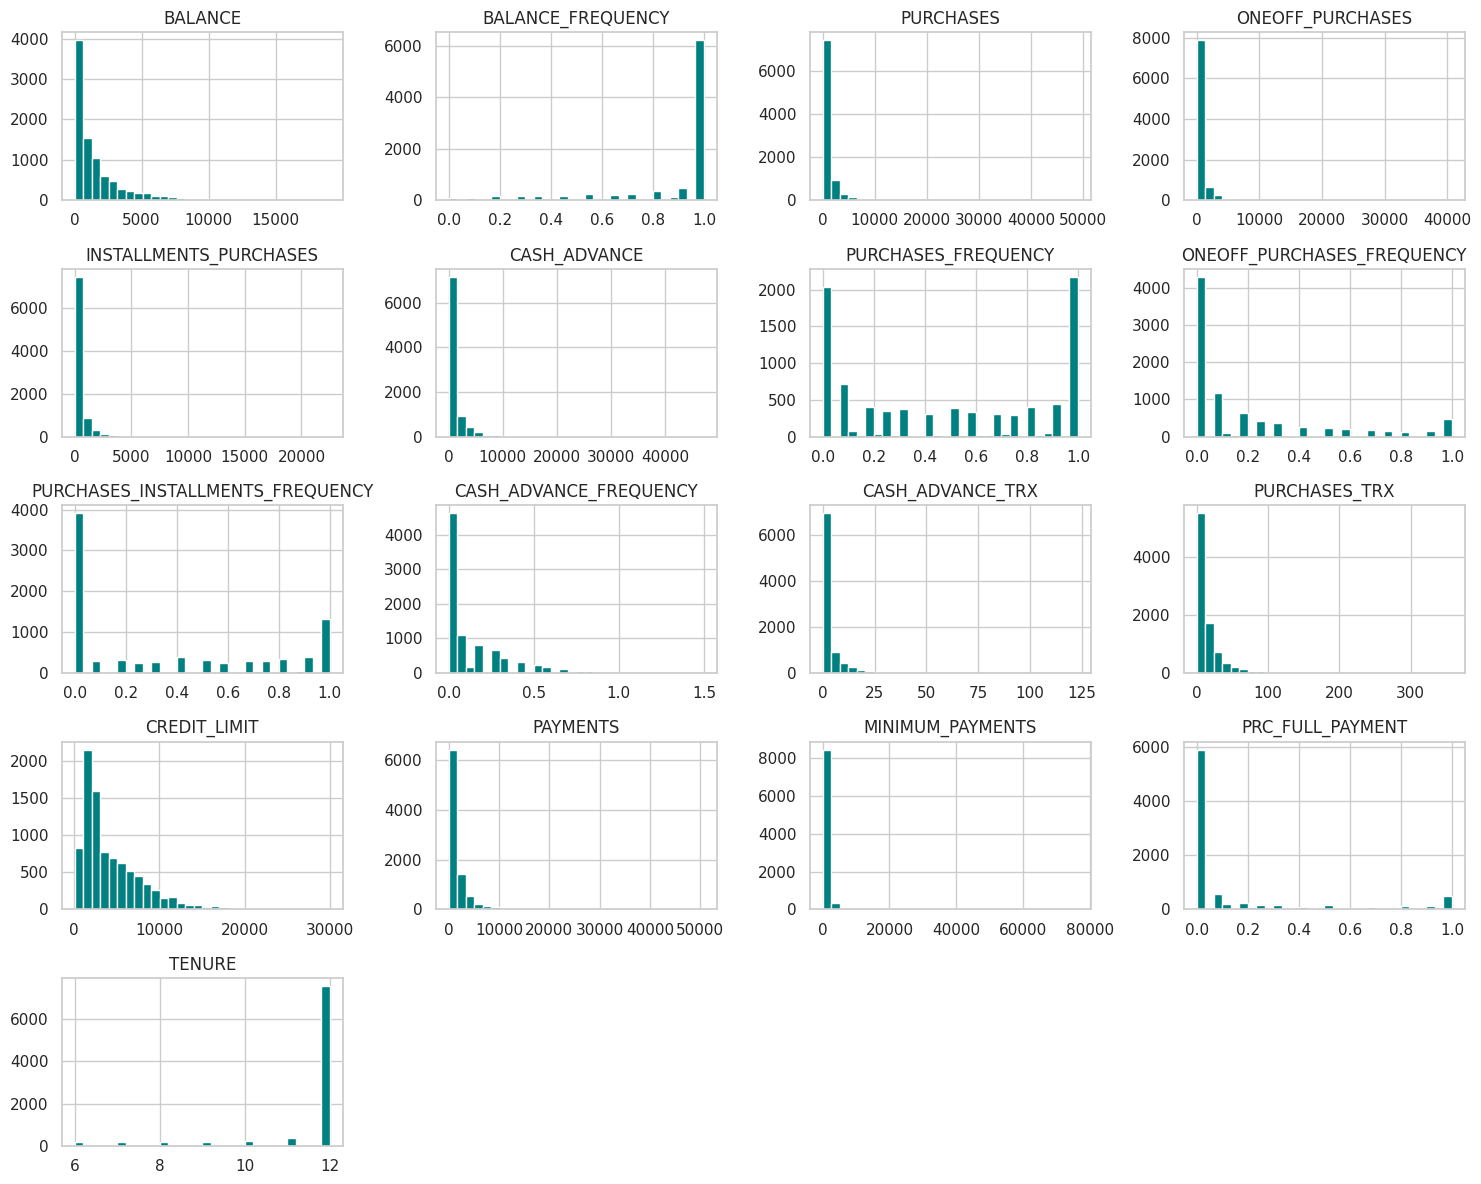

In [13]:
# Histogramas para entender a distribuição
df.hist(figsize=(15,12), bins=30, color='teal')
plt.tight_layout()
plt.show()

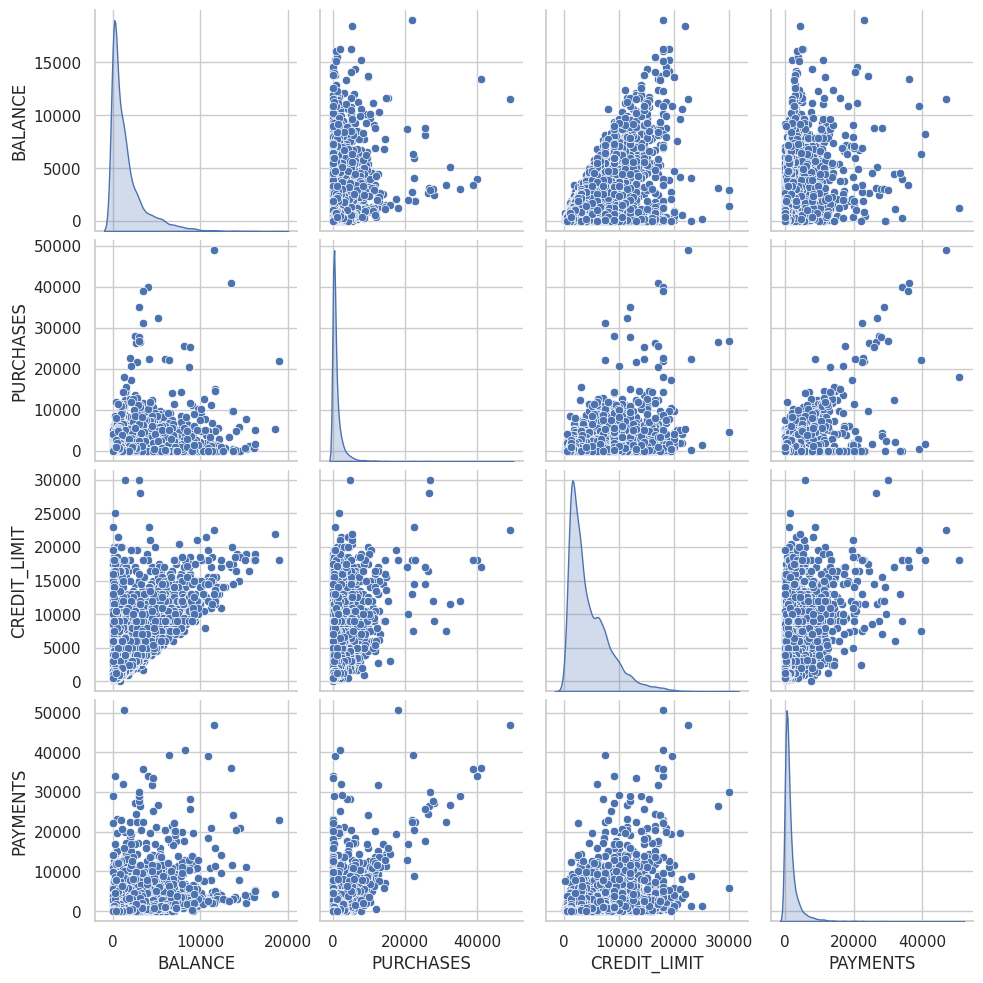

In [15]:
# Visualizando a relação entre as principais variáveis financeiras
cols_interesse = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
sns.pairplot(df[cols_interesse], diag_kind='kde')
plt.show()

### 📋 Estrutura Final do Dataset
Após as etapas de limpeza e tratamento de valores ausentes, o dataset apresenta a seguinte configuração:

* **Total de Registros:** 8950 entradas.
* **Total de Colunas:** 18 atributos.
* **Estado de Limpeza:** 0 valores ausentes (Non-null).

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [17]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### ⚖️ Padronização (Standardization)
Para garantir que todos os atributos contribuam igualmente para a análise de componentes principais, aplicamos o `StandardScaler`. Este processo é vital para remover o viés causado pelas diferentes unidades de medida e ordens de grandeza presentes no dataset original.


In [ ]:

# Lista das colunas selecionadas para padronização
colunas_para_padronizar = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'
]

# Inicializar o escalonador
scaler_stand = StandardScaler()

# Aplicar a padronização apenas nas colunas selecionadas
df[colunas_para_padronizar] = scaler_stand.fit_transform(df[colunas_para_padronizar])

# Verificação visual rápida (as médias devem ser próximas a 0 e desvios próximos a 1)
df[colunas_para_padronizar].describe().round(2)

In [18]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### 📉 Análise de Multicolinearidade
Foi gerado um **Heatmap de Correlação** para identificar redundâncias entre os atributos. Variáveis com alta correlação (como `PURCHASES` e `ONEOFF_PURCHASES`) são excelentes candidatas para a compressão via **PCA**, permitindo reduzir o número de dimensões sem perda significativa de informação.

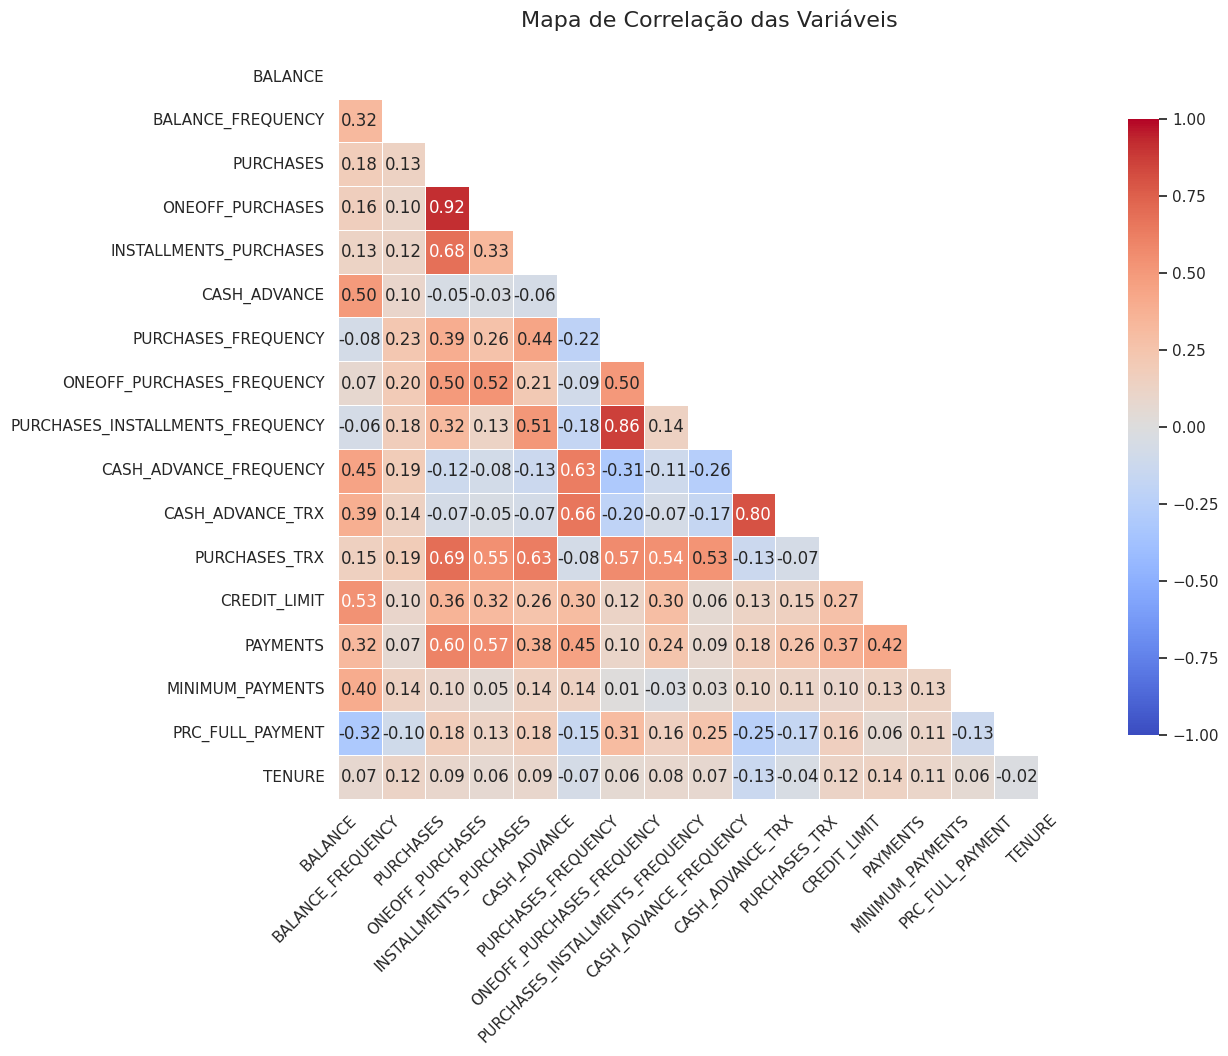

In [19]:

# 1. Carregar os dados (certifique-se de usar o dataframe sem valores nulos)
# df = pd.read_csv('Credit_Card_Updated.csv')

# 2. Remover colunas não numéricas (como o ID do cliente)
df_numeric = df.drop(columns=['CUST_ID'])

# 3. Calcular a matriz de correlação
corr = df_numeric.corr()

# 4. Criar uma máscara para o triângulo superior (opcional, para limpeza visual)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 5. Configurar o estilo e o tamanho da figura
plt.figure(figsize=(12, 10))
sns.set_theme(style="white")

# 6. Gerar o Heatmap
heatmap = sns.heatmap(
    corr,
    mask=mask,
    annot=True,           # Mostra os números dentro dos quadrados
    fmt=".2f",            # Formata para 2 casas decimais
    cmap='coolwarm',      # Cores: Azul (negativo), Branco (neutro), Vermelho (positivo)
    vmin=-1, vmax=1,      # Define os limites da legenda de cores
    center=0,
    linewidths=.5,
    square=True,
    cbar_kws={"shrink": .8}
)

# 7. Ajustar títulos
plt.title('Mapa de Correlação das Variáveis', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')

# 8. Mostrar ou Salvar
plt.show()


### 🆔 Gerenciamento de Identificadores
A coluna `CUST_ID` foi isolada do conjunto de dados principal. Esta ação é necessária para:
1. **Compatibilidade Matemática:** Algoritmos como PCA e K-Means operam apenas com matrizes numéricas.
2. **Rastreabilidade:** A variável foi preservada em memória para permitir a re-identificação dos clientes após a rotulação dos clusters.



In [20]:
#Armazenar coluna id
coluna_id = df['CUST_ID']

In [21]:
#Excluir a coluna ID
df = df.drop(columns=['CUST_ID'])

In [22]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### 💾 Exportação de Dados
O dataset processado (limpo, com nulos tratados e variáveis padronizadas) foi exportado para um novo arquivo CSV. Este arquivo serve como base para as etapas de Modelagem e Clustering.

* **Arquivo:** `Credit_Card_Processed.csv`
* **Formato:** Inclusão do `CUST_ID` original com os atributos transformados via `StandardScaler`.



In [23]:
# 1. Criar uma cópia para exportação para não afetar o DataFrame atual
df_export = df.copy()

# 2. Inserir a coluna CUST_ID de volta na primeira posição
df_export.insert(0, 'CUST_ID', coluna_id.values)

# 3. Definir o caminho de salvamento
caminho_salvamento = '/content/drive/MyDrive/Data Science - Kaggle - Cluster/credit card/Credit_Card_Processed.csv'

# 4. Salvar o arquivo
df_export.to_csv(caminho_salvamento, index=False)

print(f"Arquivo salvo com sucesso em: {caminho_salvamento}")

Arquivo salvo com sucesso em: /content/drive/MyDrive/Data Science - Kaggle - Cluster/credit card/Credit_Card_Processed.csv
